# **MNIST : Digits recognition**
***
BAIM MOHAMED , 06/07/2023

## **MNIST Dataset :**
***
Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import tensorflow as tf
from tensorflow import keras

**Train/Test/Valid sets**

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Normalizing imgs
x_train = x_train / 255.0
x_test = x_test / 255.0

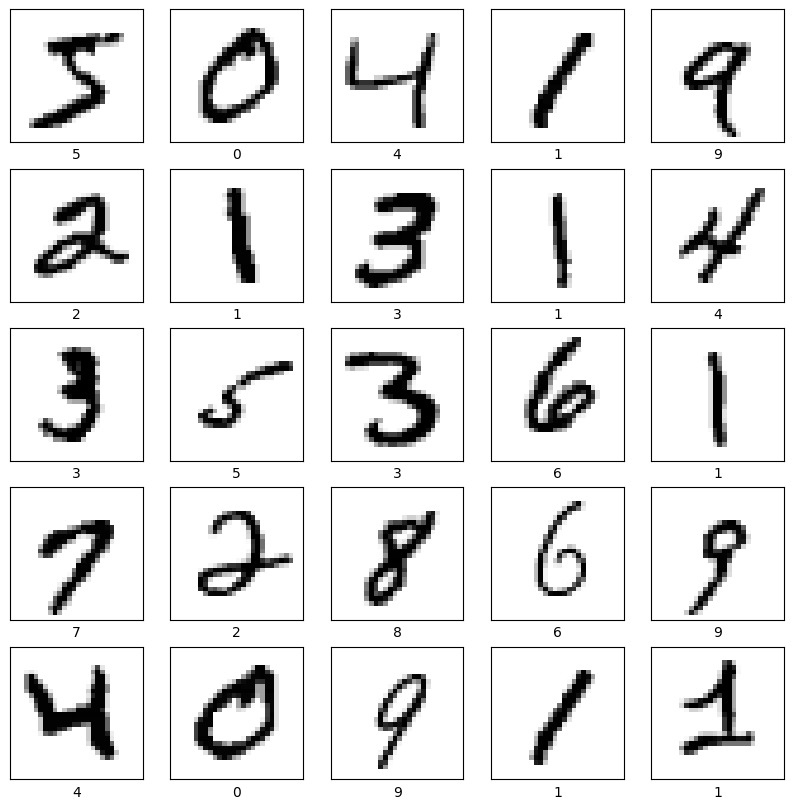

In [4]:
# Display the first 25 images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


In [5]:
print(len(x_train))
print(len(x_test))
print(x_train[0].shape)

60000
10000
(28, 28)


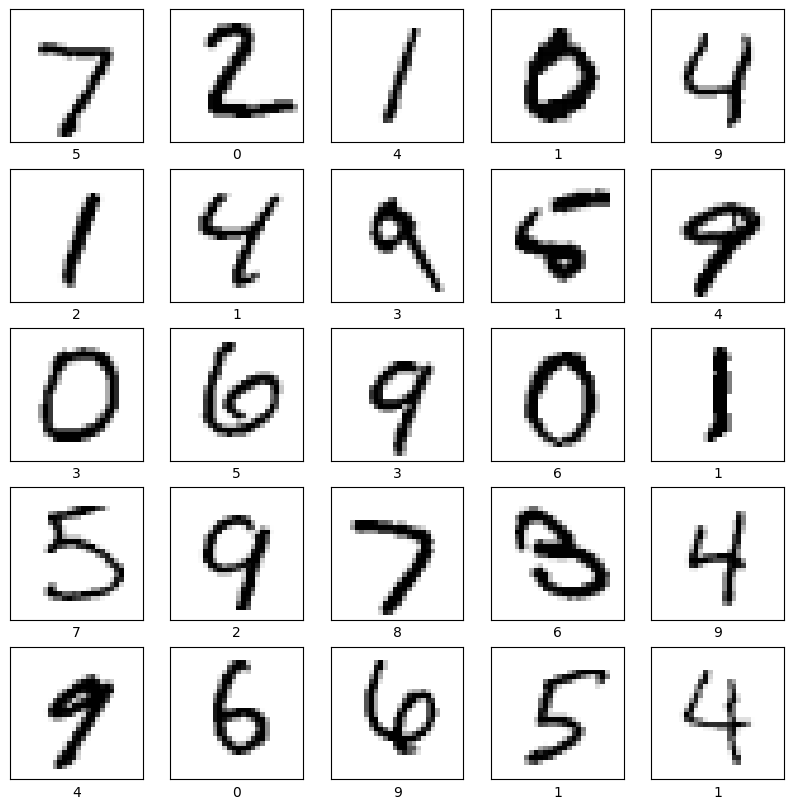

In [6]:
# Display the first 25 images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## **MLP : MultiLayer perceptron**
***
Let's implement MLP !


### **1- Architecture of MLP**

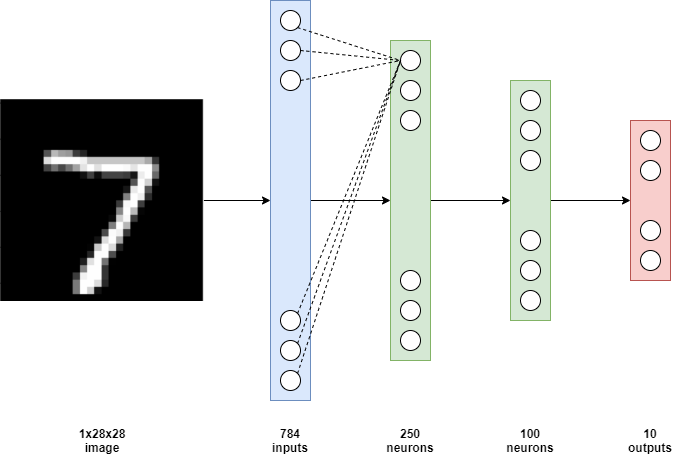

### **2- MLP Model**

In [7]:
from keras.layers import Flatten, Dense
from keras import Sequential

In [8]:
mlp = Sequential([
    Flatten(input_shape= (28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


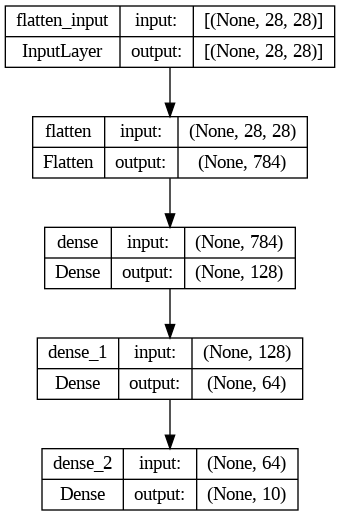

In [9]:
from keras.utils import plot_model
plot_model(mlp,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [10]:
# Compile the model
from keras.optimizers import  Adam

mlp.compile(optimizer=Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Training the model
history = mlp.fit(x_train, y_train, epochs=5, batch_size=32,validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 16s 6ms/step - loss: 0.2218 - accuracy: 0.9326 - val_loss: 0.1856 - val_accuracy: 0.9459
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1264 - accuracy: 0.9621 - val_loss: 0.1295 - val_accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1058 - accuracy: 0.9683 - val_loss: 0.1076 - val_accuracy: 0.9694
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0905 - accuracy: 0.9729 - val_loss: 0.1238 - val_accuracy: 0.9699
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0838 - accuracy: 0.9754 - val_loss: 0.1215 - val_accuracy: 0.9708


Text(0, 0.5, 'Categorical Accuracy')

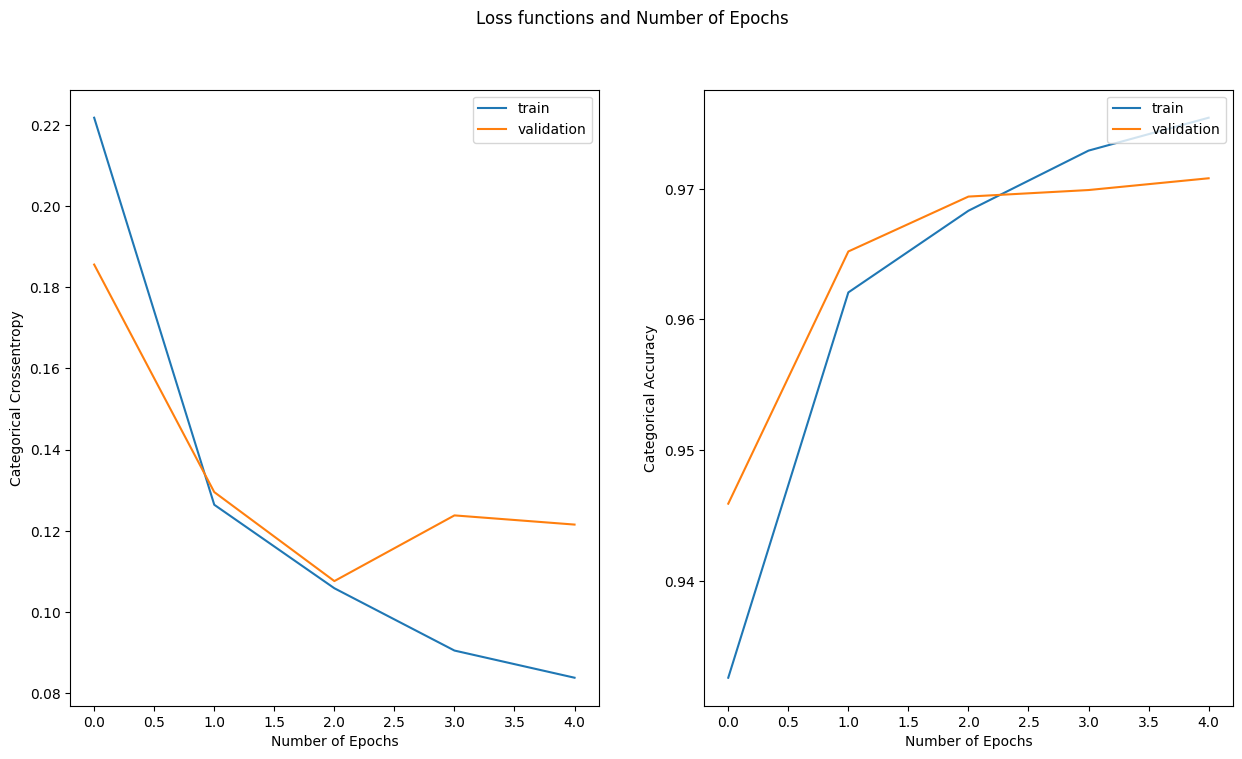

In [12]:
#Visualizing the loss parameters

fig, axs = plt.subplots(1,2, figsize=(15, 8))
plt.suptitle('Loss functions and Number of Epochs')
(ax1, ax2) = axs

#1st plot : Categorical Crossentropy vs epochs
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend(loc="upper right")
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Categorical Crossentropy')

#2nd plot : Categorical accuracy vs epochs
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='validation')
ax2.legend(loc="upper right")
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Categorical Accuracy')

In [13]:
# Evaluate the model
test_loss, test_acc = mlp.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1215 - accuracy: 0.9708


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.96      0.97      0.96       982
           5       0.98      0.95      0.97       892
           6       0.99      0.96      0.97       958
           7       0.98      0.97      0.98      1028
           8       0.93      0.98      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



"plt.figure(figsize=(10, 8))\nplt.imshow(cm, cmap=plt.cm.Blues)\nplt.title('Confusion Matrix')\nplt.colorbar()\nplt.xlabel('Predicted labels')\nplt.ylabel('True labels')\nplt.xticks(np.arange(10))\nplt.yticks(np.arange(10))\nplt.show()"

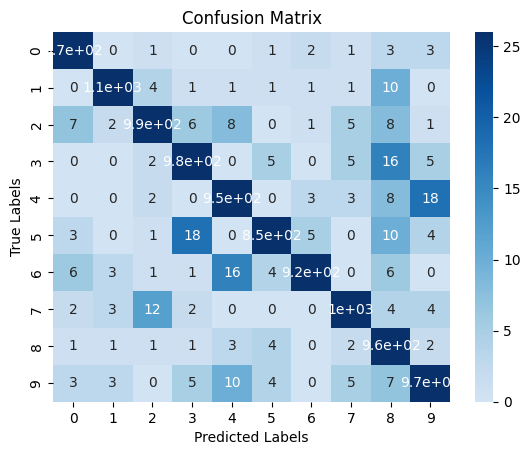

In [14]:
# Confusion Matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

predictions = mlp.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

## Classification report

report = classification_report(y_test, y_pred)
print(report)

## Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, vmin=0, vmax=26, center=10, cmap=plt.cm.Blues, annot=True)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

'''plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()'''

### **3- Conclusion**

MLP is showing good results on MNIST Dataset : 97% acuuracy, 0.96 f1_score

## **LeNet - 5**
***


### **1- LeNet-5 architecture**

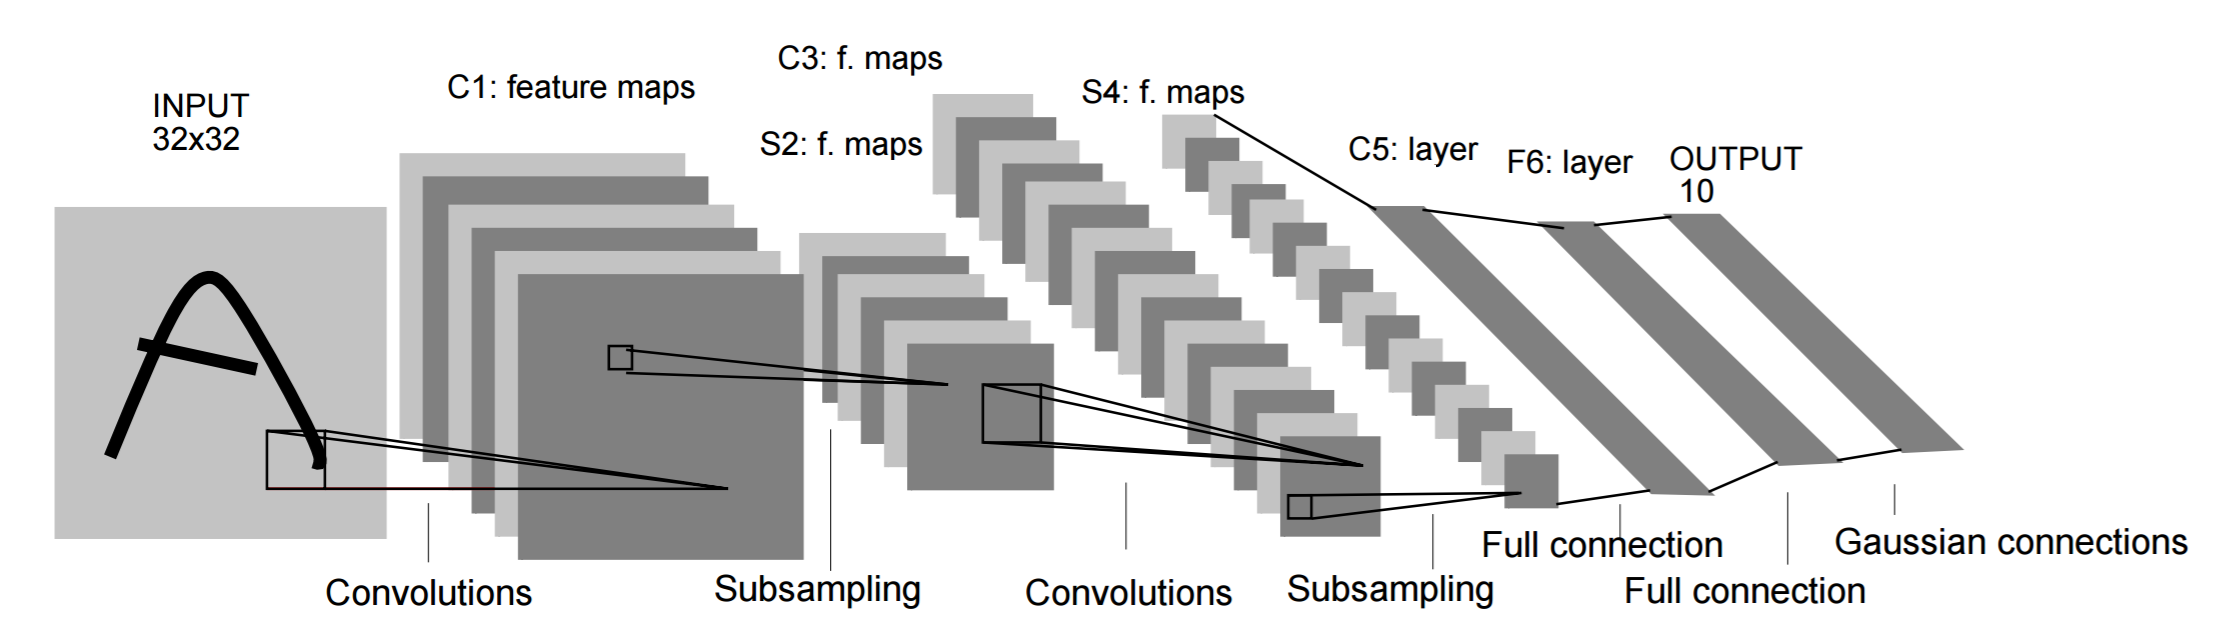



### **2- Kernel/filter example of convolution**

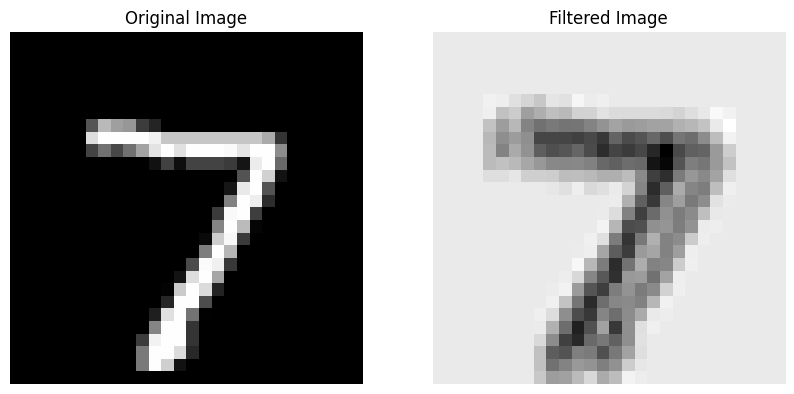

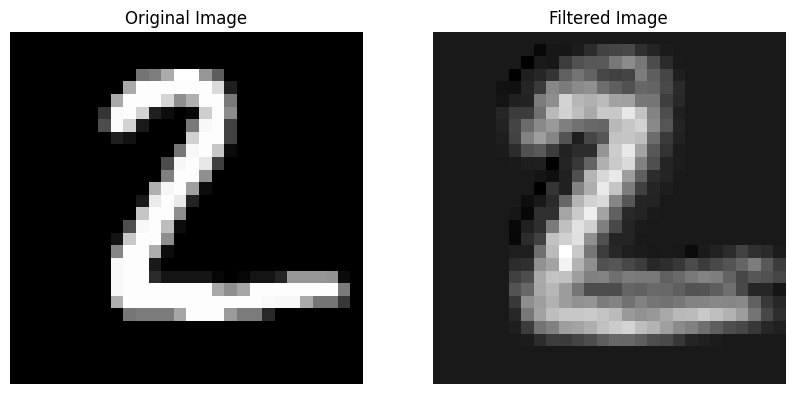

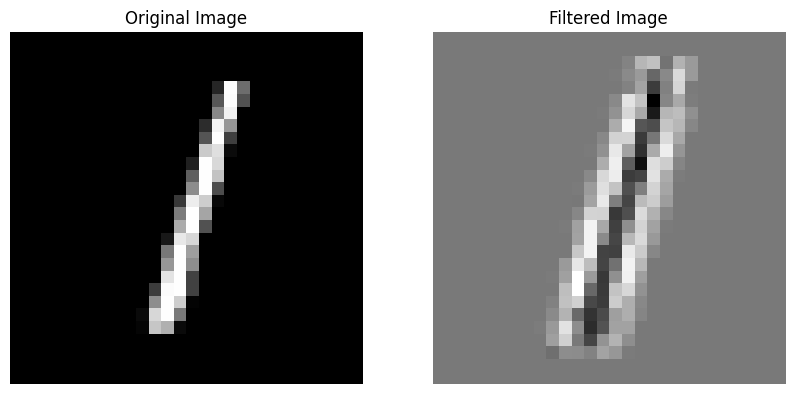

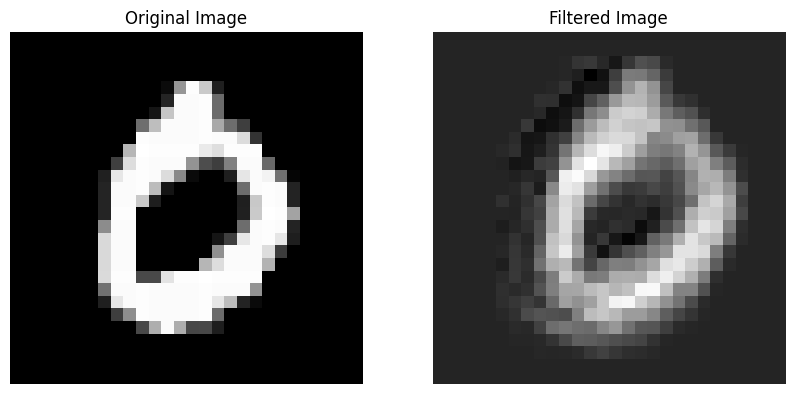

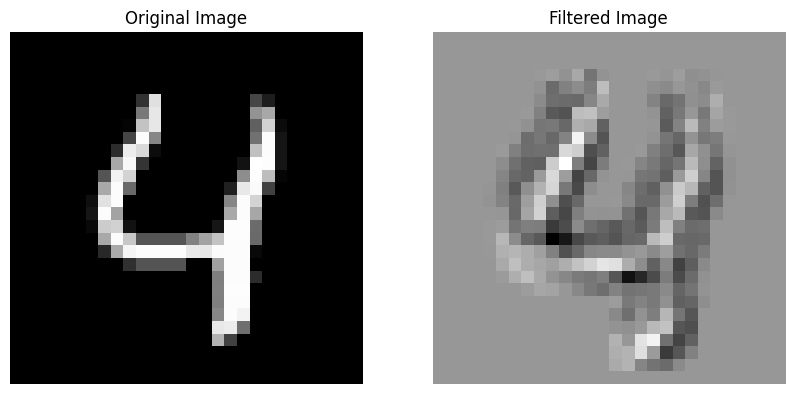

In [15]:
for i in range(5):
  image = x_test[i]
  image_tensor = tf.expand_dims(image, axis=0)
  image_tensor = tf.expand_dims(image_tensor, axis=-1)
  image_tensor = tf.cast(image_tensor, tf.float32)

  # Define the 5x5 filter/kernel
  filter_size = 5
  filter_weights = np.random.randn(filter_size, filter_size, 1, 1).astype(np.float32)
  filter_tensor = tf.constant(filter_weights)

  # Apply convolution using the filter
  output_tensor = tf.nn.conv2d(image_tensor, filter_tensor, strides=[1, 1, 1, 1], padding='SAME')
  output_image = output_tensor.numpy()[0, :, :, 0]

  # Plot
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('Original Image')
  axes[0].axis('off')

  axes[1].imshow(output_image, cmap='gray')
  axes[1].set_title('Filtered Image')
  axes[1].axis('off')

  plt.show()

### **3- LeNet-5 : The Model**

In [16]:
# Packages
from keras.layers import Conv2D, MaxPooling2D

In [17]:
LeNet = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])
LeNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

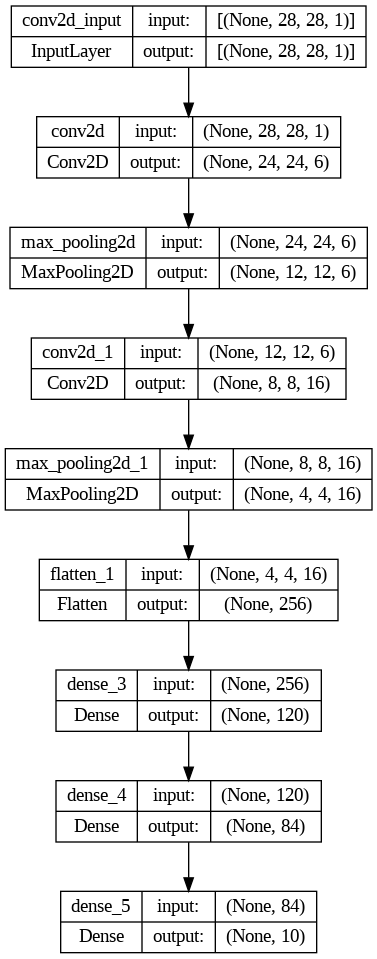

In [18]:
plot_model(LeNet,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [19]:
# Compile The model

LeNet.compile(optimizer=Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = LeNet.fit(x_train, y_train, epochs=20, batch_size=32,validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1544 - accuracy: 0.9526 - val_loss: 0.0729 - val_accuracy: 0.9757
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0739 - accuracy: 0.9783 - val_loss: 0.1061 - val_accuracy: 0.9689
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0645 - accuracy: 0.9814 - val_loss: 0.0690 - val_accuracy: 0.9807
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.0629 - val_accuracy: 0.9826
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0544 - accuracy: 0.9852 - val_loss: 0.0445 - val_accuracy: 0.9875
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0485 - accuracy: 0.9871 - val_loss: 0.0606 - val_accuracy: 0.9862
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0503 - accuracy: 0.9872 - val_loss: 0.0660 - val_accuracy:

Text(0, 0.5, 'Categorical Accuracy')

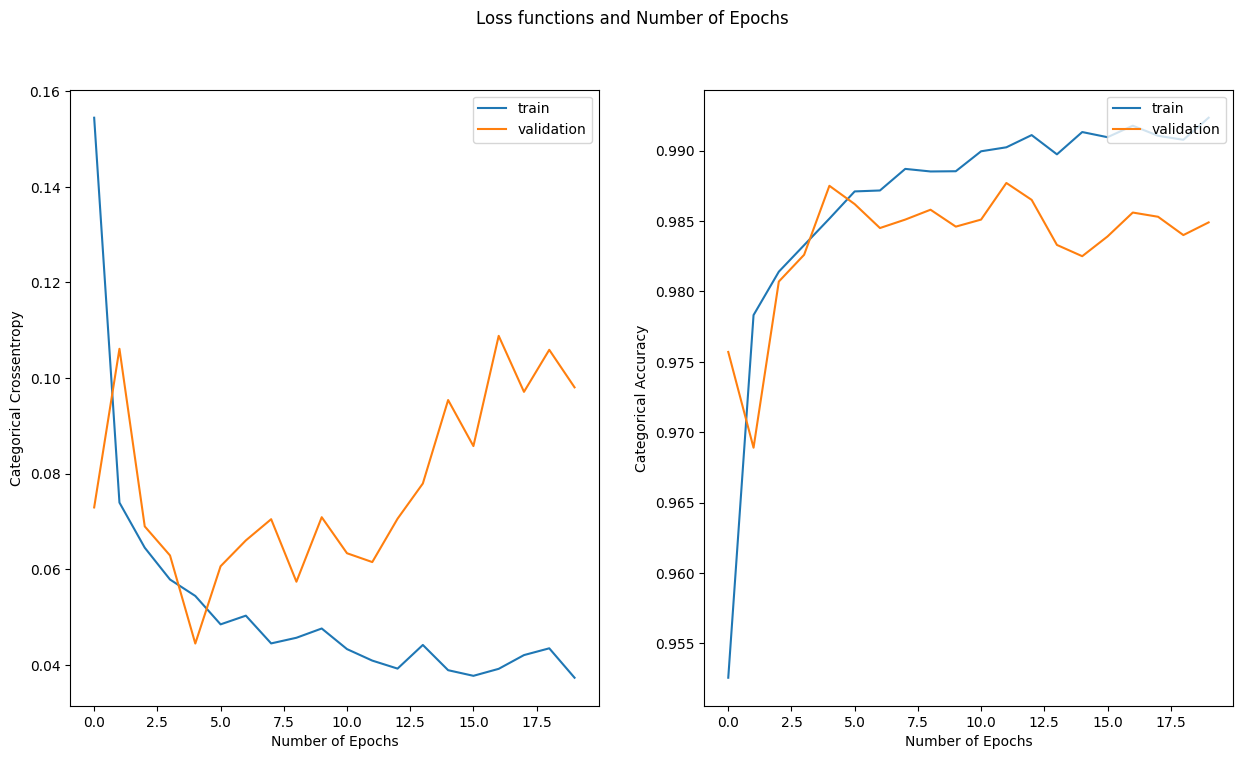

In [21]:
#Visualizing the loss parameters

fig, axs = plt.subplots(1,2, figsize=(15, 8))
plt.suptitle('Loss functions and Number of Epochs')
(ax1, ax2) = axs

#1st plot : Categorical Crossentropy vs epochs
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend(loc="upper right")
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Categorical Crossentropy')

#2nd plot : Categorical accuracy vs epochs
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='validation')
ax2.legend(loc="upper right")
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Categorical Accuracy')

In [22]:
# Evaluate the model
test_loss, test_acc = LeNet.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0980 - accuracy: 0.9849


313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 1.0, 'Confusion Matrix')

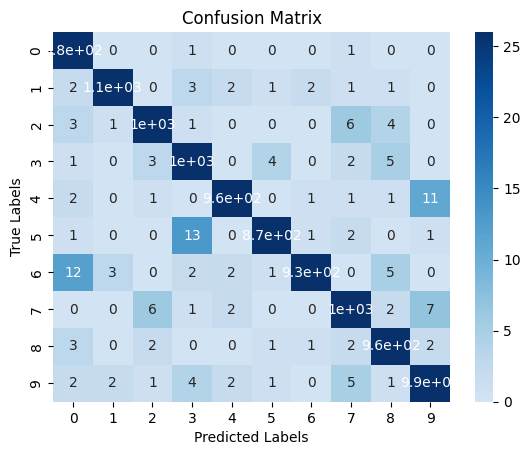

In [23]:
predictions = LeNet.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

## Classification report

report = classification_report(y_test, y_pred)
print(report)

## Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, vmin=0, vmax=26, center=10, cmap=plt.cm.Blues, annot=True)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

### **4- Conclusion**

LeNet is showing better results on MNIST Dataset : 98% acuuracy, 0.99 f1_score

## **VGG Model**
***


### **1- Architecture**
Below the architecture of VGG-16 for 224x224 image
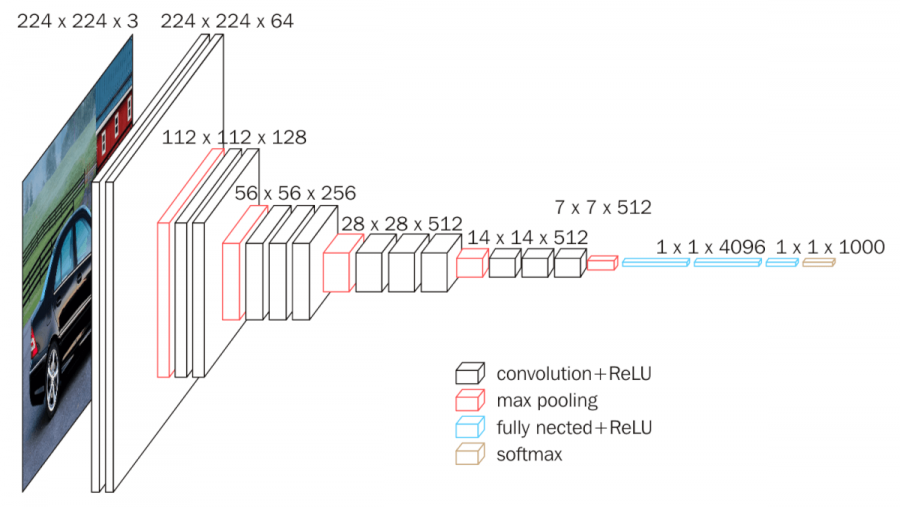

### **2- VGG The Model**
I modified the VGG architecture for the MNIST dataset by adjusting the number of convolutional layers and reducing the number of filters compared to the original VGG architecture.

In [24]:
VGG = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
VGG.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

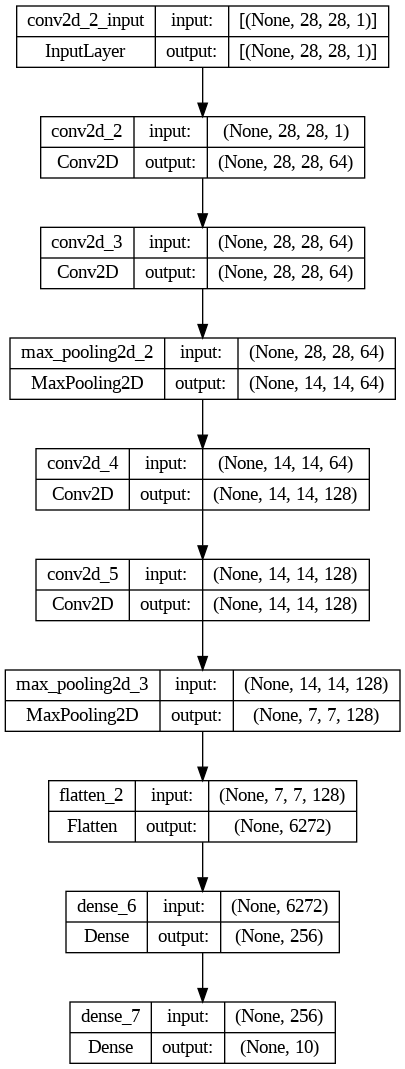

In [25]:
plot_model(VGG,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [26]:
# Compile The model

VGG.compile(optimizer=Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history = VGG.fit(x_train, y_train, epochs=10, batch_size=32,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1513 - accuracy: 0.9523 - val_loss: 0.0437 - val_accuracy: 0.9836
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0672 - accuracy: 0.9803 - val_loss: 0.0808 - val_accuracy: 0.9774
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0531 - accuracy: 0.9847 - val_loss: 0.0705 - val_accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0489 - accuracy: 0.9854 - val_loss: 0.0493 - val_accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0493 - accuracy: 0.9858 - val_loss: 0.0632 - val_accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0415 - accuracy: 0.9879 - val_loss: 0.0523 - val_accuracy: 0.9861
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0460 - accuracy: 0.9876 - val_loss: 0.0839 - val_ac

Text(0, 0.5, 'Categorical Accuracy')

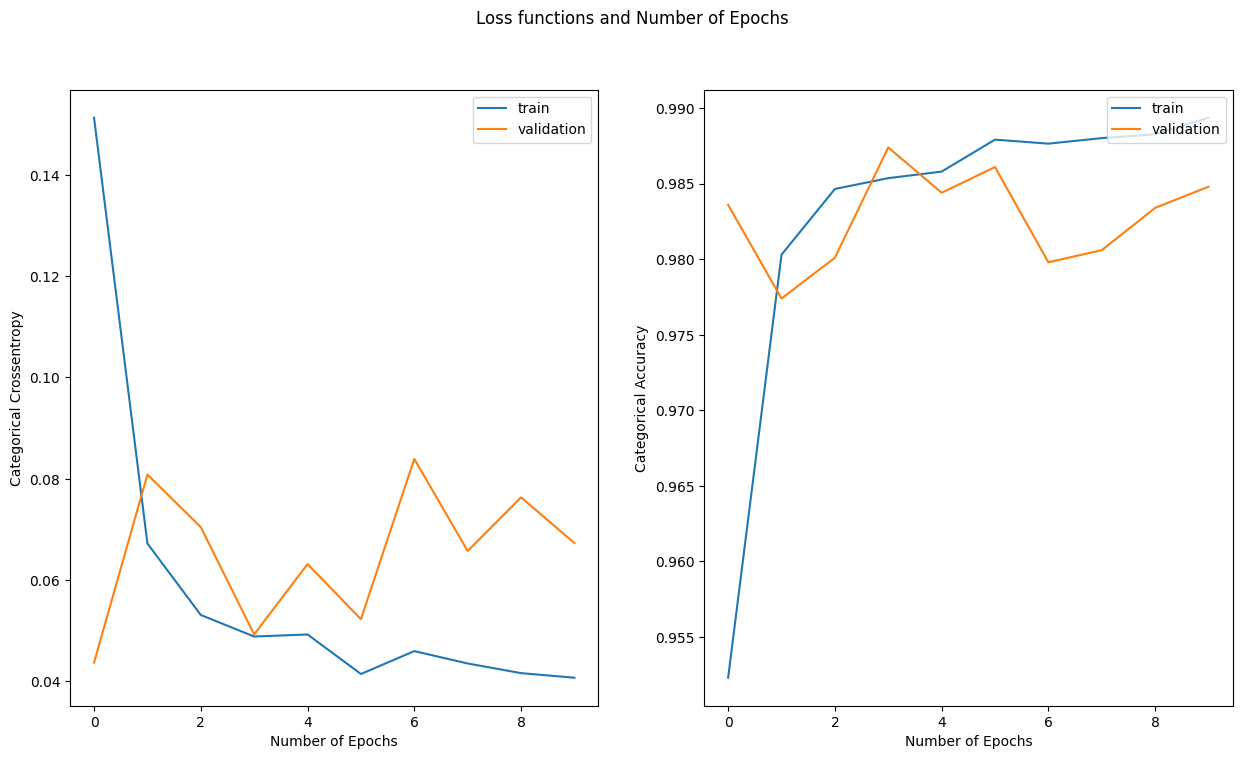

In [28]:
#Visualizing the loss parameters

fig, axs = plt.subplots(1,2, figsize=(15, 8))
plt.suptitle('Loss functions and Number of Epochs')
(ax1, ax2) = axs

#1st plot : Categorical Crossentropy vs epochs
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend(loc="upper right")
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Categorical Crossentropy')

#2nd plot : Categorical accuracy vs epochs
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='validation')
ax2.legend(loc="upper right")
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Categorical Accuracy')

In [29]:
# Evaluate the model
test_loss, test_acc = VGG.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0673 - accuracy: 0.9848


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.97      0.99       982
           5       0.98      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 1.0, 'Confusion Matrix')

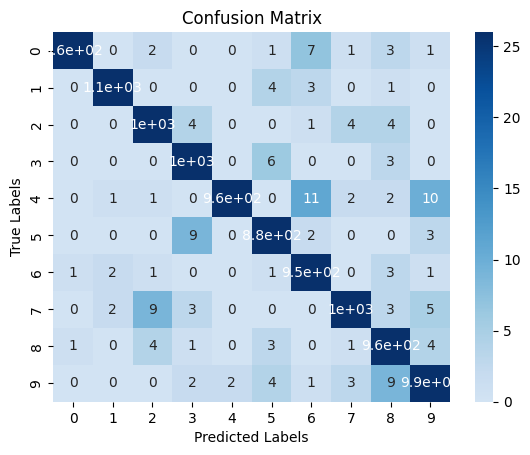

In [30]:
predictions = VGG.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

## Classification report

report = classification_report(y_test, y_pred)
print(report)

## Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, vmin=0, vmax=26, center=10, cmap=plt.cm.Blues, annot=True)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

### **3- Conclusion**

LeNet is showing good results on MNIST Dataset : 99% acuuracy, 0.99 f1_score

## **ResNet**
***

### **1- ResNets Architecture**

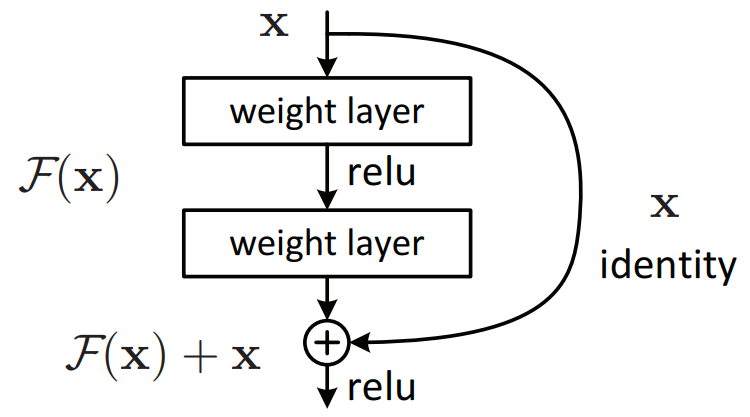

### **2- Resnet Model**
***
I modified the ResNet architecture for the MNIST **dataset** by reducing the number of layers and filters compared to the original ResNet. The architecture includes three residual blocks, each consisting of two convolutional layers with batch normalization and a residual connection.

In [31]:
from keras.layers import BatchNormalization , GlobalAveragePooling2D

In [34]:
# Stack residual blocks
input_shape = (28, 28, 1)
inputs = tf.keras.Input(shape=input_shape)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

num_res_blocks = 3
for _ in range(num_res_blocks):
    residual = x
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x, residual])  # Residual connection

x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

# Create the ResNet model
resnet = tf.keras.Model(inputs=inputs, outputs=outputs)
resnet.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_20 (Conv2D)             (None, 28, 28, 64)   640         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_14 (BatchN  (None, 28, 28, 64)  256         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 14, 14, 64)  0           ['batch_normalization_14[0]

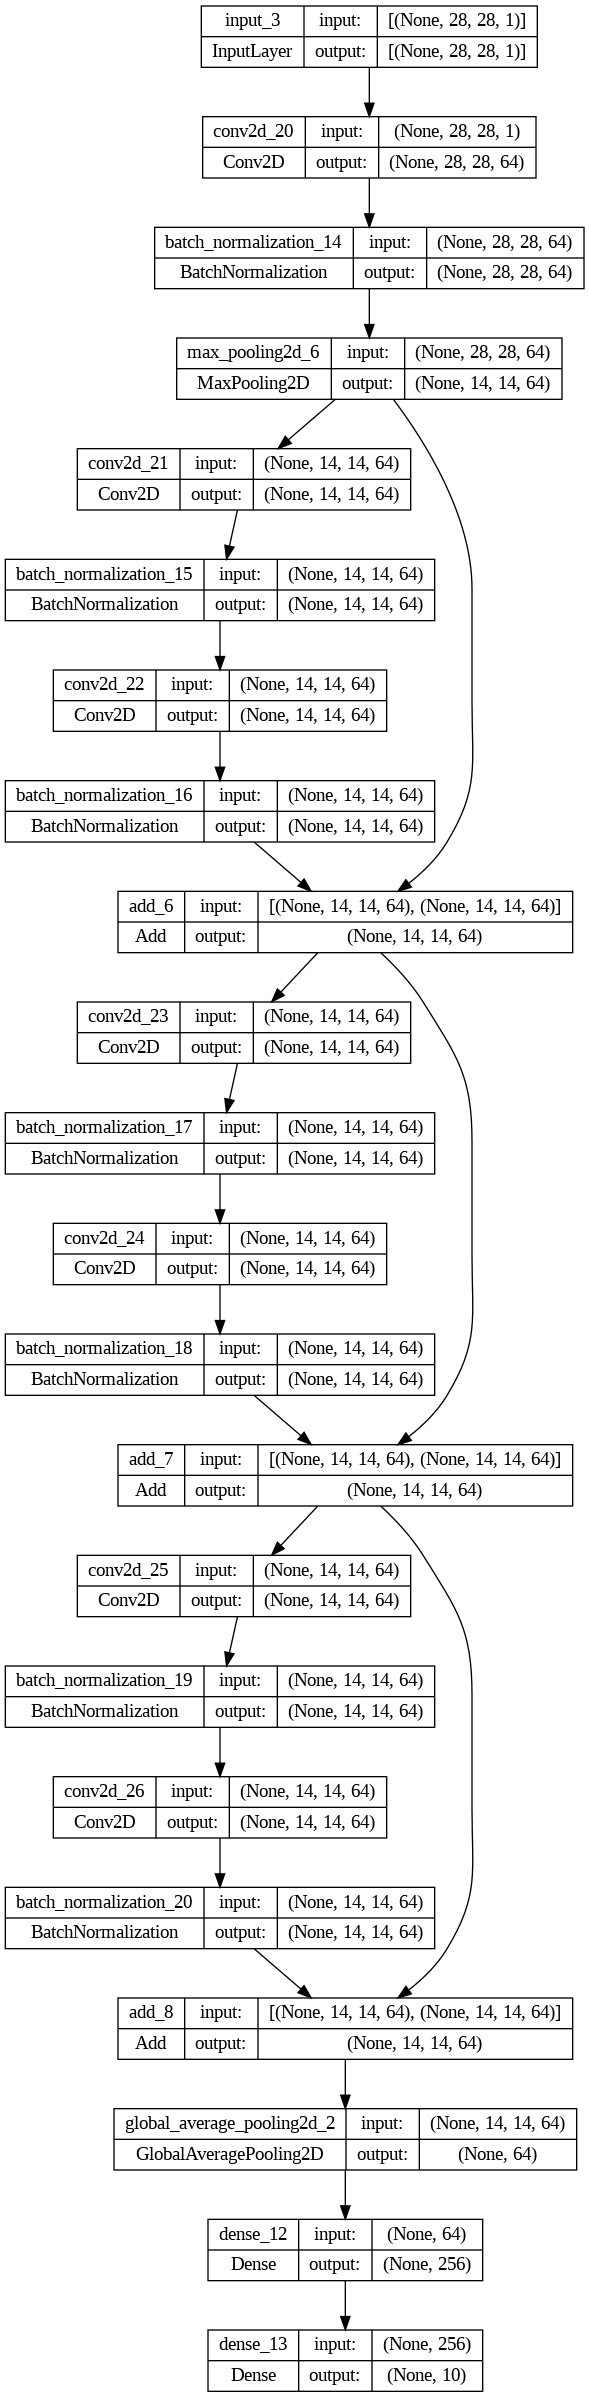

In [35]:
plot_model(resnet,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [36]:
resnet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
history = resnet.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0079 - accuracy: 0.9973 - val_loss: 0.0253 - val_accuracy: 0.9922
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0376 - val_accuracy: 0.9888
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0257 - val_accuracy: 0.9920
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0205 - val_accuracy: 0.9941
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0413 - val_accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.0381 - val_accuracy: 0.9894
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0293 - val_accuracy: 0.9908

Text(0, 0.5, 'Categorical Accuracy')

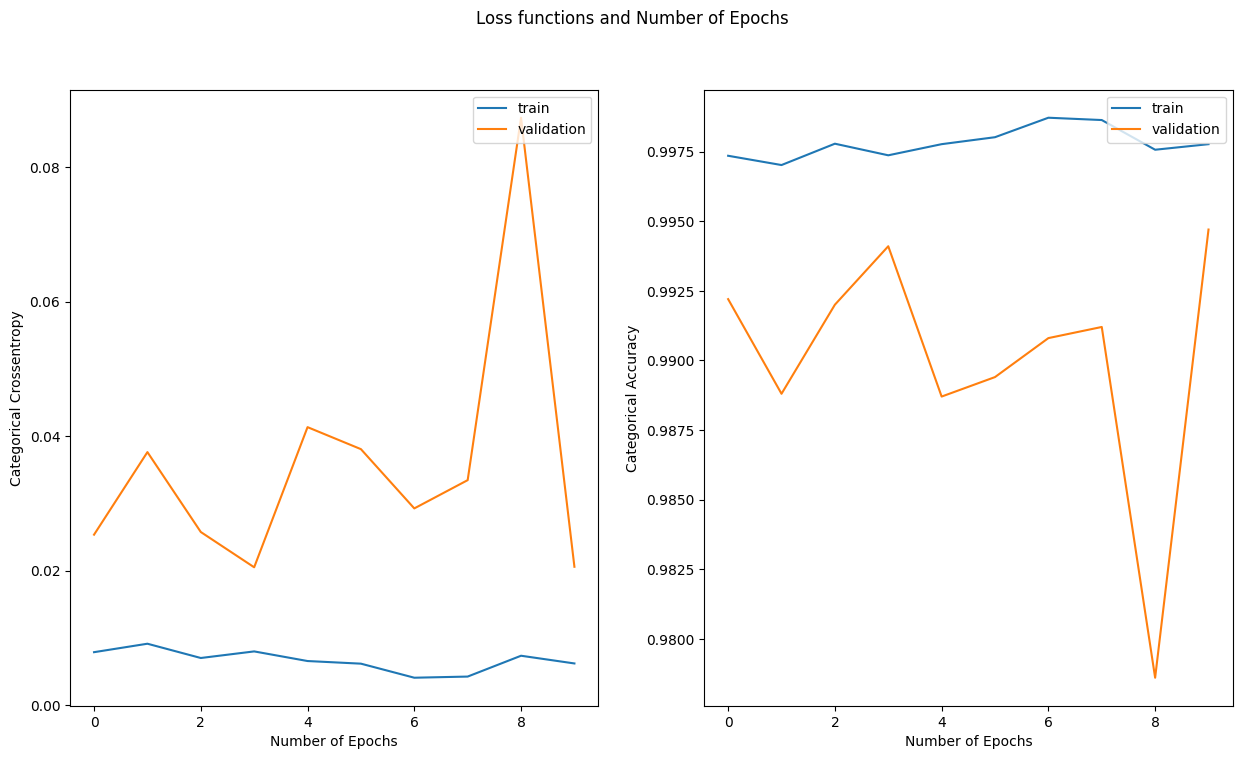

In [43]:
#Visualizing the loss parameters

fig, axs = plt.subplots(1,2, figsize=(15, 8))
plt.suptitle('Loss functions and Number of Epochs')
(ax1, ax2) = axs

#1st plot : Categorical Crossentropy vs epochs
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend(loc="upper right")
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Categorical Crossentropy')

#2nd plot : Categorical accuracy vs epochs
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='validation')
ax2.legend(loc="upper right")
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Categorical Accuracy')

In [44]:
# Evaluate the model
test_loss, test_acc = resnet.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0206 - accuracy: 0.9947


313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      1.00      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      1.00      1.00      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(0.5, 1.0, 'Confusion Matrix')

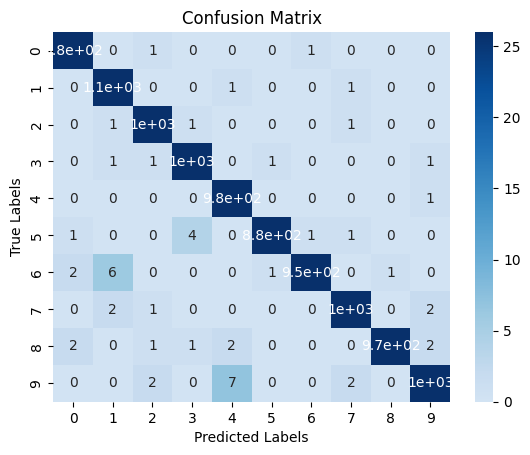

In [45]:
predictions = resnet.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

## Classification report

report = classification_report(y_test, y_pred)
print(report)

## Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, vmin=0, vmax=26, center=10, cmap=plt.cm.Blues, annot=True)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

###**3- Conclusion**
Resnet show better results: accuracy 99%, F1-score entre 0.99 et 1.0

## **Comparative Table**
***

               accuracy            f1score

    MLP :         97%               0.96

    LeNet :       98%               0.99

    VGG :         99%               0.99

    ResNet :      99%             0.99-1.0

***


**END**

*BAIM Mohamed*